Gabriel Jonathan - 2020362,

Machine Learning for AI - CA 1

Githun Project: https://github.com/gabrieljonathan/MLCA1



#####################################

#Performing initial data analysis (EDA)

We begin by performing an initial analysis of the data to understand its characteristics, distributions, and relationships between variables, using Python libraries like pandas, seaborn, and matplotlib.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#Data Loading and Exploration
#This uses pd.read_csv to load data from the CSV file "log2.csv" into a pandas DataFrame. The data is then analysed with the describe() method.

In [3]:
# Load the data
data = pd.read_csv("log2.csv")

# Display basic statistics of the dataset
print(data.describe())

        Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
count  65532.000000      65532.000000     65532.000000          65532.000000   
mean   49391.969343      10577.385812     19282.972761           2671.049930   
std    15255.712537      18466.027039     21970.689669           9739.162278   
min        0.000000          0.000000         0.000000              0.000000   
25%    49183.000000         80.000000         0.000000              0.000000   
50%    53776.500000        445.000000      8820.500000             53.000000   
75%    58638.000000      15000.000000     38366.250000            443.000000   
max    65534.000000      65535.000000     65535.000000          65535.000000   

              Bytes    Bytes Sent  Bytes Received       Packets  \
count  6.553200e+04  6.553200e+04    6.553200e+04  6.553200e+04   
mean   9.712395e+04  2.238580e+04    7.473815e+04  1.028660e+02   
std    5.618439e+06  3.828139e+06    2.463208e+06  5.133002e+03   
min    6.00

Output 1: The code creates a count plot with Seaborn to visualise the distribution of the Action variable, displaying the frequency of each unique action in the dataset.

#Histograms
#This part generates histograms of all numerical features in the DataFrame except the 'Action' column. The figure size is adjusted for clarity, and a title is added to the plot. Histograms show the distribution of data points for each feature.

<Figure size 864x576 with 0 Axes>

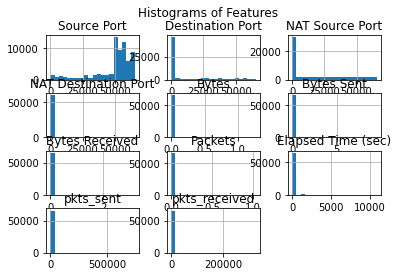

In [4]:
# Visualize distributions of features using histograms
plt.figure(figsize=(12, 8))
data.drop('Action', axis=1).hist(bins=20)  # Creating histograms for all features except 'Action'
plt.suptitle('Histograms of Features')  # Adding a title to the plot
plt.show()  # Displaying the plot

Output 2: 
The code uses Matplotlib to generate histograms for all numerical features except Action, which provide a visual representation of each feature's distribution.

#Count Plot
#To create a count plot to show the distribution of values in the 'Action' column, a categorical variable. To improve readability, the plot now includes a title and labels.

C:\Users\Gabriel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


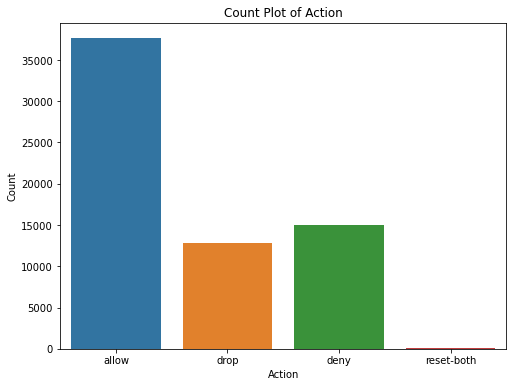

In [5]:
# Create a count plot for the 'Action' variable to show class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['Action']) 
# Adding a title to the plot
plt.title('Count Plot of Action')  
plt.xlabel('Action')  
plt.ylabel('Count')  
plt.show() 


Output 4:  The count plot shows that "allow"(blue) is the most common action, followed by "drop"(orange) and "deny"(green), while the histograms show that some features have uniform distributions and others have skewed distributions.

#Correlation Matrix
#In this section, we will create a heatmap to show the correlation coefficients between all numerical features in the DataFrame. The heatmap uses a coolwarm colour scheme to display the correlation values within each cell.

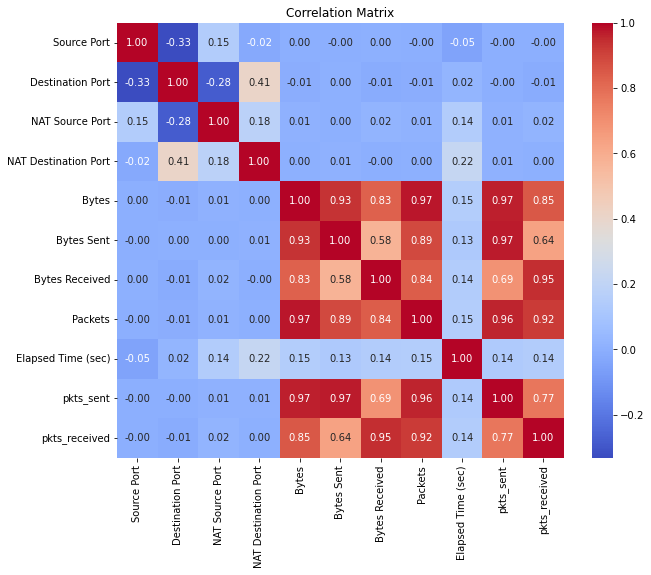

In [6]:
# Visualize the correlation matrix between features using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")  
plt.title('Correlation Matrix')  
plt.show()  



Outuput 5:
The correlation matrix shows pairwise correlation coefficients between features, with colours indicating correlation strength and values representing actual correlation coefficients. For example, Bytes Sent and Bytes Received have a strong positive correlation, whereas Source Port and Destination Port have a weak negative correlation.

#Plots

Box plots illustrate the distribution of each feature in the dataset. The plots show that some features are skewed to the right, while others are more evenly distributed, with a few outliers in places.


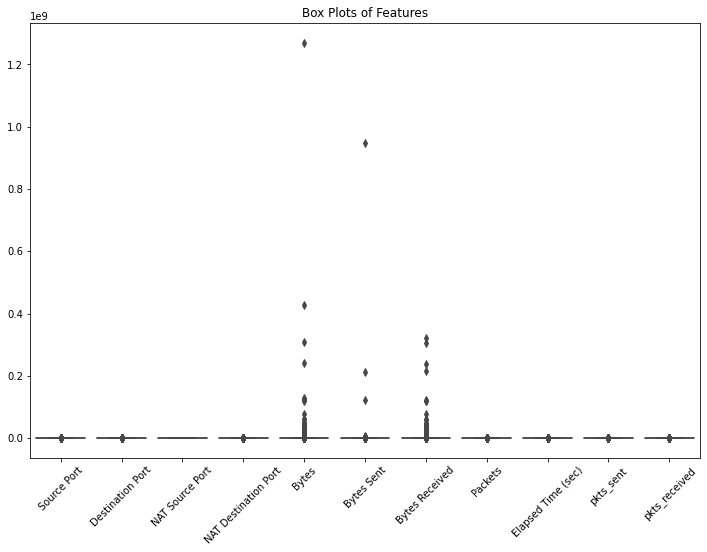

In [7]:
# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=data.drop('Action', axis=1))
plt.title('Box Plots of Features')
plt.xticks(rotation=45)
plt.show()

#Output 6:The correlation matrix shows that Bytes Sent and Bytes Received (0.97) have a strong positive correlation, as does Packet Sent and Packets Received (0.96), indicating a strong relationship between these features. Furthermore, there is a weak negative correlation between Source Port and Destination Port (-0.33). The correlation matrix gives a quick overview of the relationships between features in the dataset, but it is important to note that correlation does not always imply causation.

#The code splits the data into features (X) and the target variable (y), with y representing the 'Action' column. The data is then split into training and testing sets using the train_test_split function.

In [8]:
# Split data into features (X) and target variable (y)
X = data.drop('Action', axis=1)  # Features
y = data['Action']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#Creates and trains a k-Nearest Neighbours (kNN) classifier with k=10 on the training data. The model is then used to make predictions about both the training and testing data.

In [9]:
# Create kNN classifier with k=10
knn = KNeighborsClassifier(n_neighbors=10)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)


#The code displays the classification results as a scatter plot, with the x-axis representing Feature 1, the y-axis representing Feature 2, and the colour of each point representing the predicted class. The plot depicts the predicted classes for the test data.

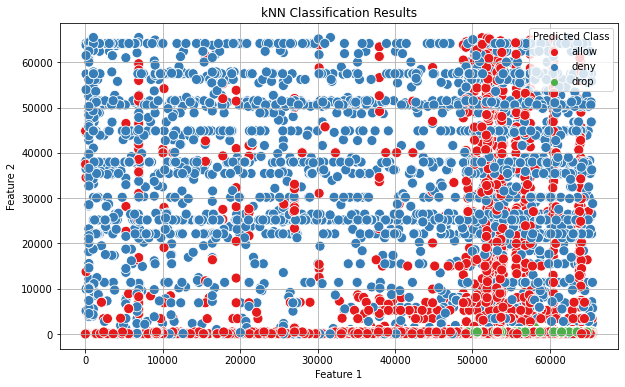

In [10]:
# Plot the classification results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_test_pred, palette='Set1', s=100)
plt.title('kNN Classification Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Predicted Class', loc='upper right')
plt.grid(True)
plt.show()

#Output 7:
The scatterplot shows the classification results of the k-Nearest Neighbours (kNN) model, with blue and red points representing correctly classified data points and green points representing incorrectly classified data points. The proportion of correctly classified points can be used to assess overall classification performance, while class-specific performance can be evaluated by looking at the distribution of blue and red points within each class region.



#The performance of the k-Nearest Neighbours (kNN) classifier is measured by comparing predicted labels to true labels. We will create a DataFrame to display the predictions and true labels, and then print the last few rows to see the results.

In [11]:
# Create a DataFrame to display predictions and true labels
predictions_KNN = pd.DataFrame({'Predicted': y_test_pred, 'True Label': y_test})

# Display the DataFrame
print(predictions_KNN.tail())

      Predicted True Label
3682       deny       deny
35425     allow      allow
44912     allow      allow
18877     allow      allow
31255     allow      allow


#Output 8:
 Displays the predicted and true labels for the testing data. The DataFrame has two columns: 'Predicted' and 'True Label'. 'Predicted' represents the kNN classifier's predicted labels, while 'True Label' represents the actual labels. The final few rows of the DataFrame are printed to show the results, which include the predicted and true labels for several data points.

#To assess the performance of the k-Nearest Neighbours (kNN) classifier, calculate the model's accuracy on both the training and testing sets. The accuracy score measures the model's ability to correctly classify data.

In [ ]:
# Calculate accuracy for training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Output 9:
shows the accuracy of the kNN classifier on both the training and testing sets. The training accuracy is 0.9938757655293088, which means that the model can correctly classify approximately 99.38% of the training data. The testing accuracy is 0.9919428676066654, which means that the model can correctly classify approximately 99.19% of the testing data.